<a href="https://colab.research.google.com/github/fmuranda/Climate_Science./blob/main/tutorials/W2D3_ExtremesandVariability/student/W2D3_Tutorial5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/neuromatch/climate-course-content/blob/main/tutorials/W2D3_ExtremesandVariability/student/W2D3_Tutorial5.ipynb) &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W2D3_ExtremesandVariability/student/W2D3_Tutorial5.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>

# Tutorial 5: Non-stationarity in Historical Records

**Week 2, Day 3, Extremes & Variability**

**Content creators:** Matthias Aengenheyster, Joeri Reinders

**Content reviewers:** Yosemley Bermúdez, Younkap Nina Duplex, Sloane Garelick, Paul Heubel, Zahra Khodakaramimaghsoud, Peter Ohue, Laura Paccini, Jenna Pearson, Derick Temfack, Peizhen Yang, Cheng Zhang, Chi Zhang, Ohad Zivan

**Content editors:** Paul Heubel, Jenna Pearson, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Paul Heubel, Jenna Pearson, Konstantine Tsafatinos, Chi Zhang, Ohad Zivan

**Our 2024 Sponsors:** CMIP, NFDI4Earth

# Tutorial Objectives

*Estimated timing of tutorial:* 25 minutes

In this tutorial, we will analyze the annual maximum sea level heights from a measurement station near Washington DC. Coastal storms, particularly when combined with high tides, can result in exceptionally high sea levels, posing significant challenges for coastal cities. Understanding the magnitude of extreme events, such as the X-year storm, is crucial for implementing effective safety measures.

By the end of this tutorial, you will gain the following abilities:

- Analyze time series data during different climate normal periods.
- Evaluate changes in statistical moments and parameter values over time to identify non-stationarity.

# Setup

In [20]:
# installations ( uncomment and run this cell ONLY when using google colab or kaggle )

# !pip install cartopy

In [21]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import genextreme as gev
import os
import pooch
import tempfile

In [22]:
# @title Install and import feedback gadget

!pip3 install vibecheck datatops --quiet

from vibecheck import DatatopsContentReviewContainer
def content_review(notebook_section: str):
    return DatatopsContentReviewContainer(
        "",  # No text prompt
        notebook_section,
        {
            "url": "https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab",
            "name": "comptools_4clim",
            "user_key": "l5jpxuee",
        },
    ).render()


feedback_prefix = "W2D3_T5"

In [23]:
# @title Figure Settings
import ipywidgets as widgets  # interactive display

%config InlineBackend.figure_format = 'retina'
plt.style.use(
    "https://raw.githubusercontent.com/neuromatch/climate-course-content/main/cma.mplstyle"
)

In [24]:
# @title Helper functions


def pooch_load(filelocation=None, filename=None, processor=None):
    shared_location = "/home/jovyan/shared/Data/tutorials/W2D3_ExtremesandVariability"  # this is different for each day
    user_temp_cache = tempfile.gettempdir()

    if os.path.exists(os.path.join(shared_location, filename)):
        file = os.path.join(shared_location, filename)
    else:
        file = pooch.retrieve(
            filelocation,
            known_hash='d1725e1e5c6ccd7561644771c9ad17ab07e553c05b4156a38cb6780aaca36edb',
            fname=os.path.join(user_temp_cache, filename),
            processor=processor,
        )

    return file

In [25]:
# @title Video 1: Non-Stationarity

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'JAzC8_lpCxw'), ('Bilibili', 'BV1pV4y1h7bB')]
tab_contents = display_videos(video_ids, W=730, H=410)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [26]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Non_Stationarity_Video")

In [27]:
# @markdown
from ipywidgets import widgets
from IPython.display import IFrame

link_id = "e6vgz"

print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/{link_id}/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)

If you want to download the slides: https://osf.io/download/e6vgz/


# Section 1: Washington DC's Maximum Sea Surface Height
Let's inspect the annual maximum sea surface height data and create a plot over time.

In [28]:
# download file: 'WashingtonDCSSH1930-2022.csv'

filename_WashingtonDCSSH1 = "WashingtonDCSSH1930-2022.csv"
url_WashingtonDCSSH1 = "https://osf.io/4zynp/download"

data = pd.read_csv(
    pooch_load(url_WashingtonDCSSH1, filename_WashingtonDCSSH1), index_col=0
).set_index("years")

In [29]:
data

,ssh
years,
1931,-140
1932,-112
1933,-6
1934,-51
1935,-94
...,...
2018,517
2019,299
2020,257


<Axes: xlabel='Time (years)', ylabel='Annual Maximum Sea Surface Height (mm)'>

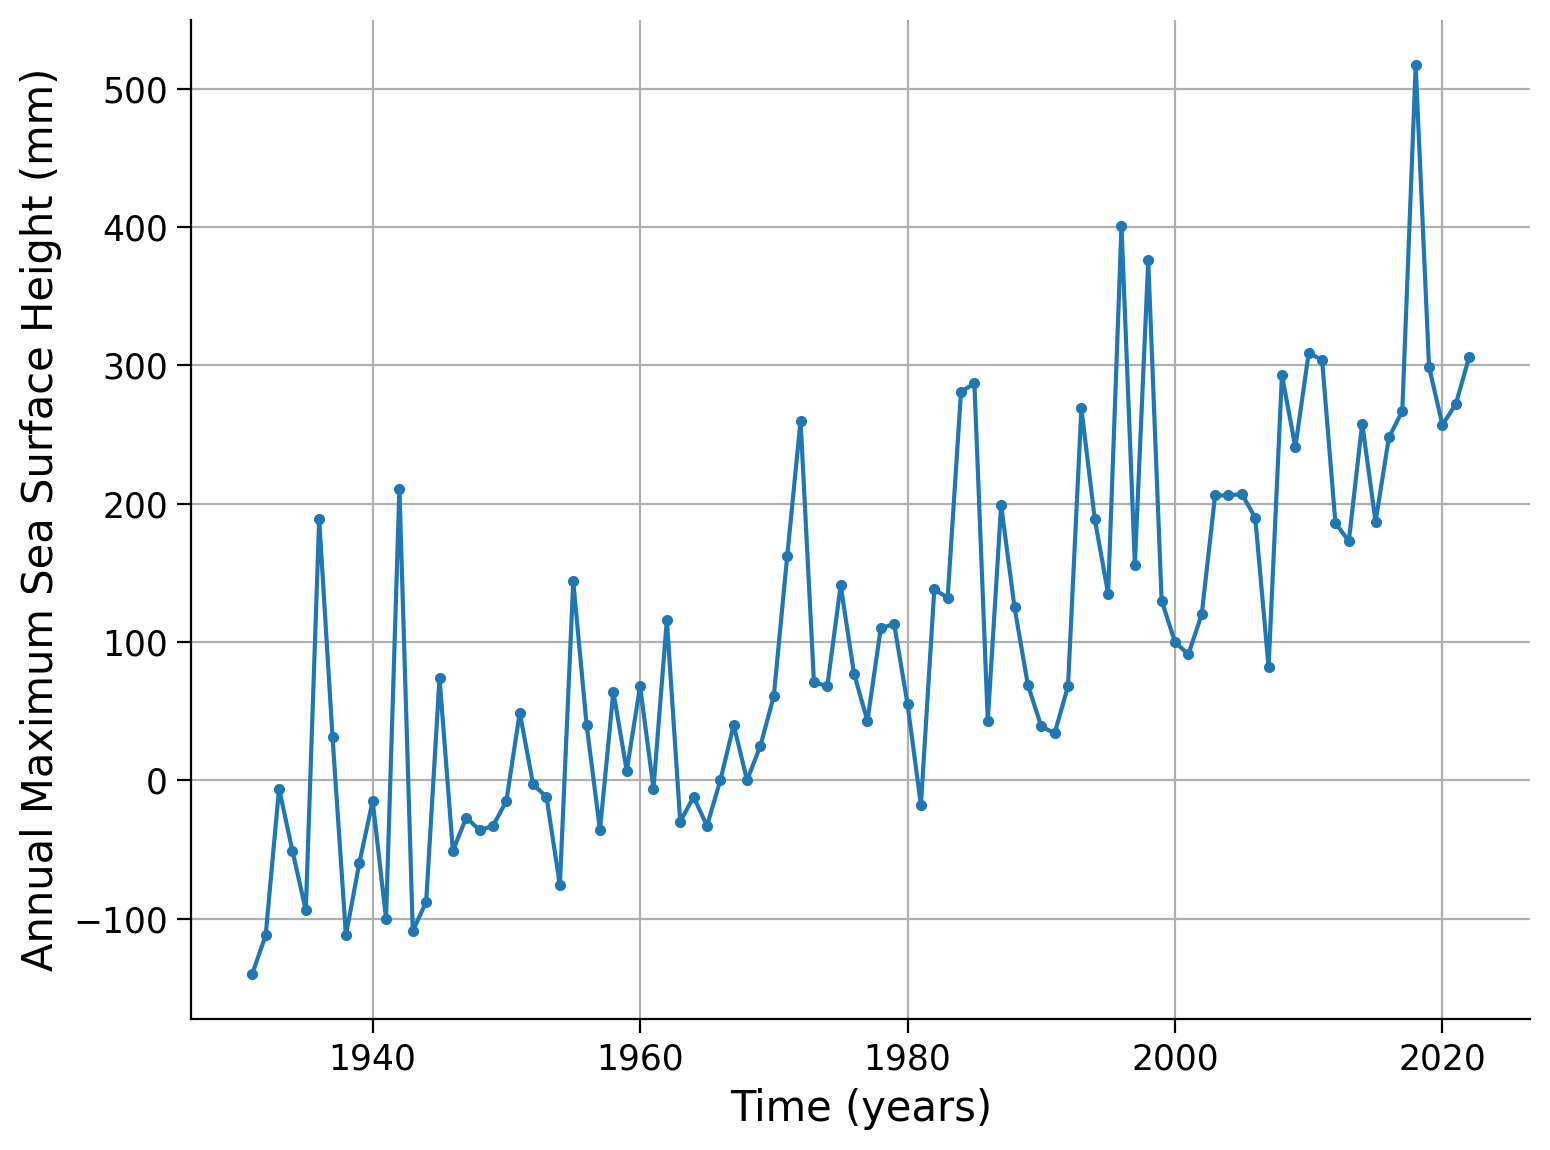

In [30]:
data.ssh.plot(
    linestyle="-", marker=".", xlabel="Time (years)", ylabel="Annual Maximum Sea Surface Height (mm)", grid=True
)

<details>
<summary> <font color='orangered'>Click here for a description of the plot  </font></summary>
Time series plot of the annual maximum sea surface height in millimeters versus time in years from a measurement station near Washington DC. The lowest annual maximum was registered in 1931, and the largest in 2018, an increasing approximately linear trend is visible, which can be attributed to the rising sea surface temperatures caused by climate change. It is important to consider this non-stationarity when analyzing the data.
</details>

In previous tutorials, we assumed that the probability density function (PDF) shape remains constant in time. In other words, the precipitation values are derived from the same distribution regardless of the timeframe. However, in today's world heavily influenced by climate change, we cannot assume that the PDF remains stable. For instance, global temperature is increasing, which causes a shift in the distribution's location. Additionally, local precipitation patterns are becoming more variable, leading to a widening of the distribution. Moreover, extreme events are becoming more severe, resulting in thicker tails of the distribution. We refer to this phenomenon as **non-stationarity**.

To further investigate this, we can group our data into three 30-year periods known as "**climate normals**". We can create a first record for the 1931 to 1960 period, a second for 1961 to 1990, and a third for 1991 to 2020, respectively. By plotting the histogram of each dataset within the same frame, we can gain a more comprehensive understanding of the changes over time.


In [31]:
# 1931-1960
data_period1 = data.iloc[0:30]
# 1961-1990
data_period2 = data.iloc[30:60]
# 1990-2020
data_period3 = data.iloc[60:90]

Text(0.5, 0, 'Annual Maximum Sea Surface Height (mm)')

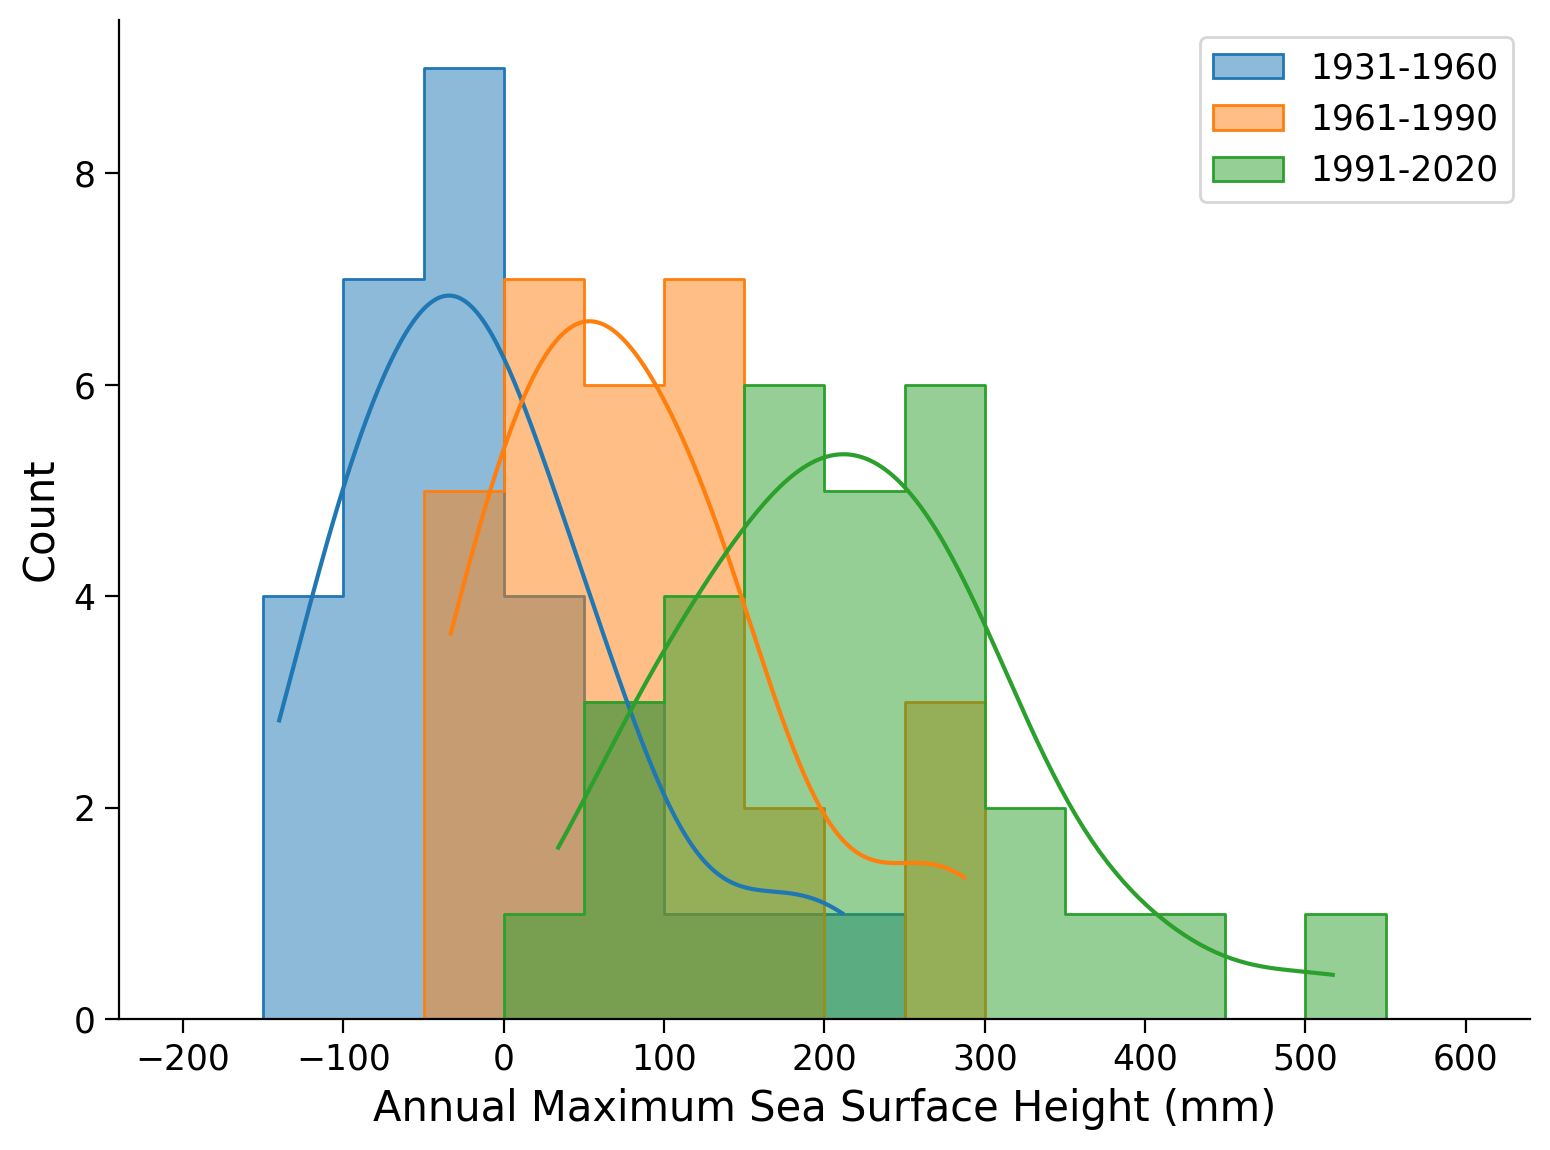

In [32]:
# plot the histograms for each climate normal identified above
fig, ax = plt.subplots()
colors =["C0","C1","C2"]

# loop over all periods of 30 years
for ind, yr in enumerate(range(30,120,30)):
    sns.histplot(
        # select climate normal periods from dataset
        data.iloc[yr-30:yr].ssh,
        bins=np.arange(-200, 650, 50),
        color=colors[ind],
        element="step",
        alpha=0.5,
        # estimate PDF via kernel density estimation
        kde=True,
        label=f"{1901+yr}-{1930+yr}",
        ax=ax,
)

# aesthetics
ax.legend()
ax.set_xlabel("Annual Maximum Sea Surface Height (mm)")

<details>
<summary> <font color='orangered'>Click here for a description of the plot  </font></summary>
Histogram of the annual maximum sea surface height in millimeters and a respective kernel density estimate of the PDF for three 30-year periods of the Washington DC dataset. The mean increases and the distribution becomes wider over time.
</details>

Let's also calculate the moments of each climate normal period:

In [33]:
# setup pandas dataframe
periods_stats = pd.DataFrame(index=["Mean", "Standard Deviation", "Skew"])

# add info for each climate normal period
periods_stats["1931-1960"] = [
    data_period1.ssh.mean(),
    data_period1.ssh.std(),
    data_period1.ssh.skew(),
]
periods_stats["1961-1990"] = [
    data_period2.ssh.mean(),
    data_period2.ssh.std(),
    data_period2.ssh.skew(),
]
periods_stats["1991-2020"] = [
    data_period3.ssh.mean(),
    data_period3.ssh.std(),
    data_period3.ssh.skew(),
]

periods_stats = periods_stats.T
periods_stats

,Mean,Standard Deviation,Skew
1931-1960,-9.966667,87.095066,0.922327
1961-1990,85.200000,87.953906,0.854553
1991-2020,216.633333,105.739264,0.701258


The mean increases as well as the standard deviation. Conversely, the skewness remains relatively stable over time, just decreasing slightly. This observation indicates that the dataset is non-stationary. To visualize the overall shape of the distribution changes, we can fit a Generalized Extreme Value (GEV) distribution to the data for each period and plot the corresponding PDF.

In [34]:
# 1931-1960
params_period1 = gev.fit(data_period1.ssh.values, 0)
shape_period1, loc_period1, scale_period1 = params_period1

# 1961-1990
params_period2 = gev.fit(data_period2.ssh.values, 0)
shape_period2, loc_period2, scale_period2 = params_period2

# 1991-2020
params_period3 = gev.fit(data_period3.ssh.values, 0)
shape_period3, loc_period3, scale_period3 = params_period3

Text(0, 0.5, 'Density')

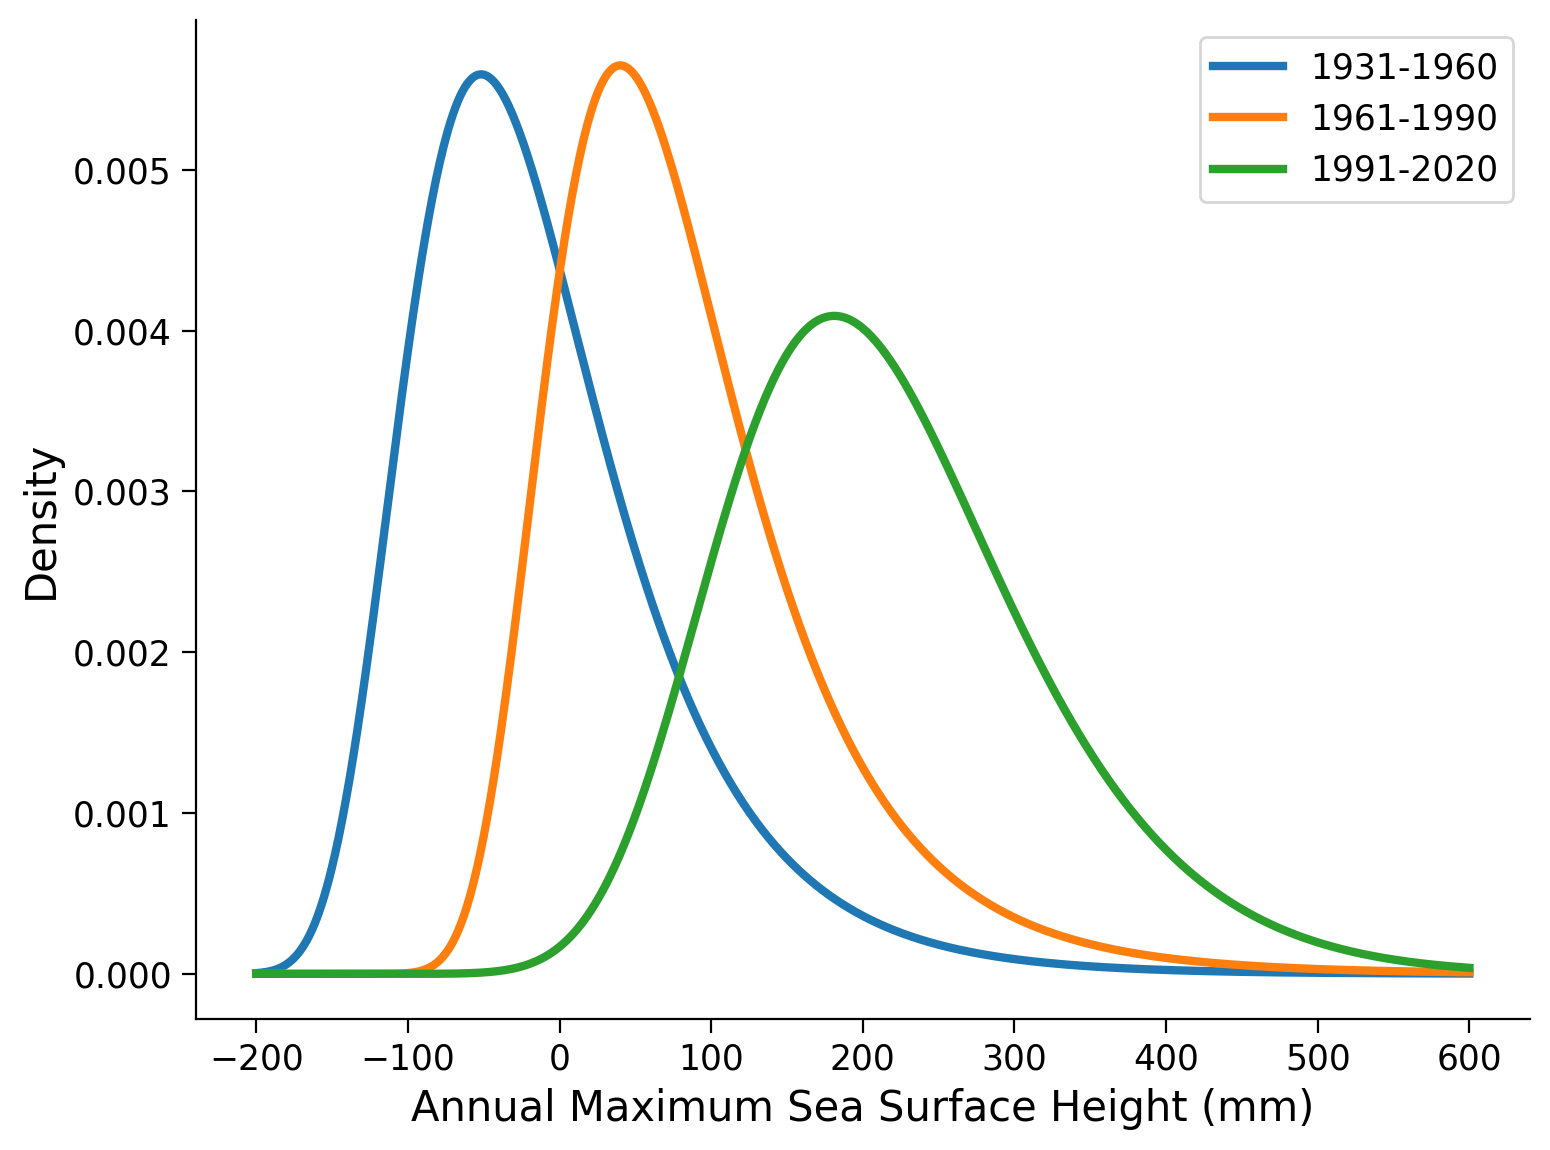

In [35]:
# initialize list to store climate normals
data_periods = []

fig, ax = plt.subplots()
# initialize array of possible annual maximum sea surface heights in mm
x = np.linspace(-200, 600, 1000)

# loop over three 30-year periods
for ind, yr in enumerate(range(30,120,30)):
    # select climate normal periods from dataset
    data_periods.append(data.iloc[yr-30:yr])
    # fit the GEV distribution parameter
    shape_period, loc_period, scale_period = gev.fit(data_periods[ind].ssh.values, 0)
    # plot GEV distribution with these parameters
    ax.plot(
        x,
        gev.pdf(x, shape_period, loc=loc_period, scale=scale_period),
        color=colors[ind],
        linewidth=3,
        # add climate normal period label
        label=f"{1901+yr}-{1930+yr}"
)
# plot aesthetics
ax.legend()
ax.set_xlabel("Annual Maximum Sea Surface Height (mm)")
ax.set_ylabel("Density")

Now, let's examine the changes in the GEV parameters. This analysis will provide valuable insights into how we can incorporate non-stationarity into our model in one of the upcoming tutorials.

## Question 1

1. Look at the plot above. Just by visual inspection, describe how the distribution changes between the periods. Which parameters of the GEV distribution do you think are responsible? How and why?

[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W2D3_ExtremesandVariability/solutions/W2D3_Tutorial5_Solution_7eb62cdb.py)



In [36]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Questions_1")

## Coding Exercise 1

1. Compare the location, scale and shape parameters of the fitted distribution for the three time periods. How do they change? Compare with your answers to the question above.

In [37]:
# setup dataframe with titles for each parameter
parameters = pd.DataFrame(index=["Location", "Scale", "Shape"])

# add in 1931-1960 parameters
parameters["1931-1960"] = ...

# add in 1961-1990 parameters
parameters["1961-1990"] = ...

# add in 1991-202 parameters
parameters["1991-2020"] = ...

# transpose the dataset so the time periods are rows
parameters = ...

# round the values for viewing
_ = ...

[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W2D3_ExtremesandVariability/solutions/W2D3_Tutorial5_Solution_9b7b8d7e.py)



In [38]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Coding_Exercise_1")

# Summary
In this tutorial, you focused on the analysis of annual maximum sea surface heights in Washington DC, specifically considering the impact of **non-stationarity** due to climate change. You've learned how to analyze time series data across different 30-year "**climate normal**" periods, and how to evaluate changes in statistical moments and parameter values over time to identify this non-stationarity. By segmenting our data into climate normal periods, you were able to compare changes in sea level trends over time and understand the increasing severity of extreme events.

# Resources

Original data from this tutorial can be found [here](https://climexp.knmi.nl/getsealev.cgi?id=someone@somewhere&WMO=360&STATION=WASHINGTON_DC&extraargs=). Note the data used in this tutorial were preprocessed to extract the annual maximum values.